In [1]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io


for data_name in ["mnist", "spam", "cifar10"]:
    data = np.load(f"../data/{data_name}-data.npz")
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)
    mnist_data = np.load(f"../data/mnist-data.npz")
    spam_data = np.load(f"../data/spam-data.npz")
    cifar10_data = np.load(f"../data/cifar10-data.npz")


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000,)


In [2]:
# Q2: Data Partitioning

# Returns indices for training_labels and training_data that are set aside for validation and for training.
def shuffle_partition(data_name, count):
    data = np.load(f"../data/{data_name}-data.npz")
    indices = np.arange(0, len(data["training_labels"]), 1)
    np.random.shuffle(indices)
    return indices[0:count], indices[count:]
    
# 10,000 training data set aside for validation.
mnist_validation, mnist_training = shuffle_partition("mnist", 10000)
# 20% of training data set aside for validation.
spam_validation, spam_training = shuffle_partition("spam", 834)
# 5,000 training data set aside for validation.
cifar10_validation, cifar10_training = shuffle_partition("cifar10", 5000)


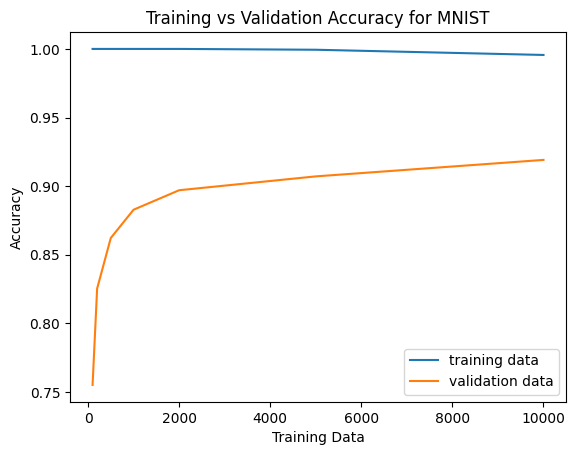

In [3]:
# Q3: Support Vector Coding -- MNIST
from sklearn.metrics import accuracy_score

# Trains and returns a Returns SVC Model
def train_svm(data, training_indices, num_train):
    clf = svm.SVC(kernel = 'linear')
    clf.fit((data["training_data"][mnist_training[:num_train]].reshape(num_train, 784)), data["training_labels"][mnist_training][:num_train])
    return clf

# Returns array of predictions using SVC Model on New Data
def predict(data, clf, reshape_num, lables):
    return clf.predict(data["training_data"][lables].reshape((reshape_num, 784)))

# Calculates accuracy of predictions based on known labels.
def class_accuracy(data, prediction, labels):
    return accuracy_score(data["training_labels"][labels], prediction)

# Create plot. 
def create_plot(num_train, training_accuracy, validation_accuracy, plot_title):
    x = num_train
    y1 = training_accuracy
    y2 = validation_accuracy
    plt.title(plot_title) 
    plt.ylabel('Accuracy') 
    plt.xlabel('Training Data')  
    plt.plot(x, y1, label = "training data")
    plt.plot(x, y2, label = "validation data") 
    plt.legend()
    plt.show()

# Train MNIST using raw pixels as features
num_train = [100, 200, 500, 1000, 2000, 5000, 10000]
training_accuracy = []
validation_accuracy = []

for num in num_train:
    clf = train_svm(mnist_data, mnist_training, num)
    training_prediction = predict(mnist_data, clf, num, mnist_training[:num])
    training_accuracy.append(class_accuracy(mnist_data, training_prediction, mnist_training[:num]))
    validation_prediction = predict(mnist_data, clf, 10000, mnist_validation)
    validation_accuracy.append(class_accuracy(mnist_data, validation_prediction, mnist_validation))

create_plot(num_train, training_accuracy, validation_accuracy, 'Training vs Validation Accuracy for MNIST')    


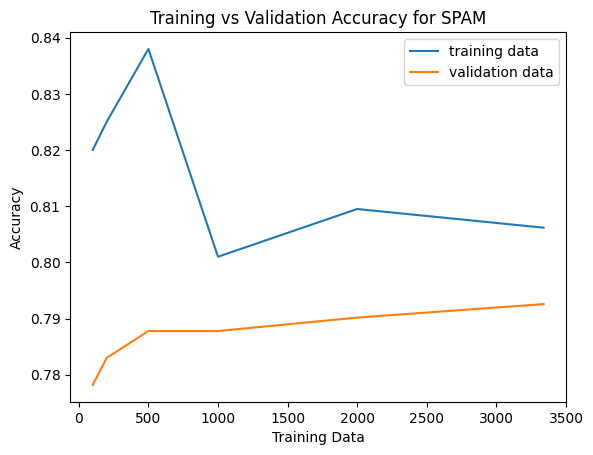

In [4]:
# Q3: Support Vector Coding -- SPAM

# Trains and returns a Returns SVC Model
def train_svm(data, training_indices, num_train):
    clf = svm.SVC(kernel = 'linear')
    clf.fit(data["training_data"][spam_training[:num_train]], data["training_labels"][spam_training][:num_train])
    return clf

# Returns array of predictions using SVC Model on New Data
def predict(data, clf, reshape_num, lables):
    return clf.predict(data["training_data"][lables])

# Train SPAM using raw pixels as features
num_train = [100, 200, 500, 1000, 2000, 3339]
training_accuracy = []
validation_accuracy = []
for num in num_train:
    clf = train_svm(spam_data, spam_training, num)
    training_prediction = predict(spam_data, clf, num, spam_training[:num])
    training_accuracy.append(class_accuracy(spam_data, training_prediction, spam_training[:num]))
    validation_prediction = predict(spam_data, clf, 834, spam_validation)
    validation_accuracy.append(class_accuracy(spam_data, validation_prediction, spam_validation))

create_plot(num_train, training_accuracy, validation_accuracy, 'Training vs Validation Accuracy for SPAM')    

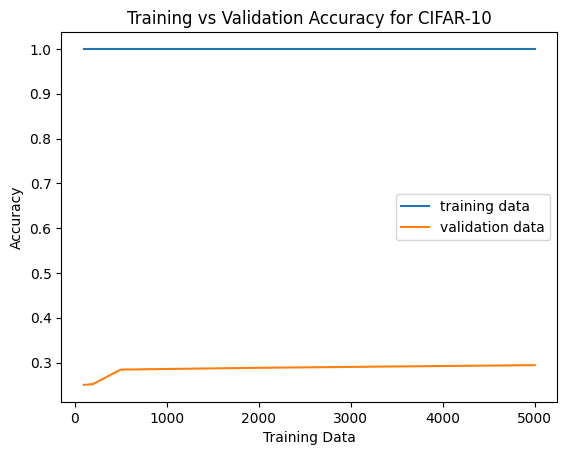

In [5]:
# Q3: Support Vector Coding -- CIFAR-10

# Trains and returns a Returns SVC Model
def train_svm(data, training_indices, num_train):
    clf = svm.SVC(kernel = 'linear')
    clf.fit(data["training_data"][cifar10_training[:num_train]], data["training_labels"][cifar10_training][:num_train])
    return clf

# Returns array of predictions using SVC Model on New Data
def predict(data, clf, reshape_num, lables):
    return clf.predict(data["training_data"][lables])

# Train CIFAR-10 using raw pixels as features
num_train = [100, 200, 500, 1000, 2000, 5000]
training_accuracy = []
validation_accuracy = []
for num in num_train:
    clf = train_svm(cifar10_data, cifar10_training, num)
    training_prediction = predict(cifar10_data, clf, num, cifar10_training[:num])
    training_accuracy.append(class_accuracy(cifar10_data, training_prediction, cifar10_training[:num]))
    validation_prediction = predict(cifar10_data, clf, 5000, cifar10_validation)
    validation_accuracy.append(class_accuracy(cifar10_data, validation_prediction, cifar10_validation))

create_plot(num_train, training_accuracy, validation_accuracy, 'Training vs Validation Accuracy for CIFAR-10')    

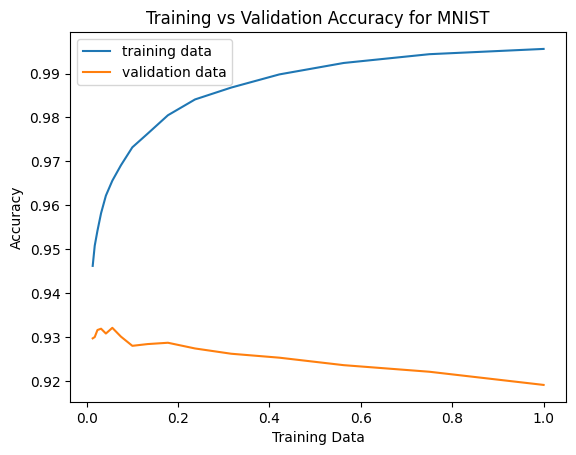

In [6]:
#Q4 Hyperparamter Sweep for MNIST dataset

# Trains and returns a Returns SVC Model
def train_svm(data, training_indices, num_train, C):
    clf = svm.SVC(kernel = 'linear', C = c)
    clf.fit((data["training_data"][mnist_training[:num_train]].reshape(num_train, 784)), data["training_labels"][mnist_training][:num_train])
    return clf

# Returns array of predictions using SVC Model on New Data
def predict(data, clf, reshape_num, lables):
    return clf.predict(data["training_data"][lables].reshape((reshape_num, 784)))

# Train MNIST using raw pixels as features
training_accuracy = []
validation_accuracy = []

# hyperparamter C
C = []
for i in range(16):
    C.append(1 * 0.75**i)
    
for c in C:
    clf = train_svm(mnist_data, mnist_training, 10000, c)
    training_prediction = predict(mnist_data, clf, 10000, mnist_training[:10000])
    training_accuracy.append(class_accuracy(mnist_data, training_prediction, mnist_training[:10000]))
    validation_prediction = predict(mnist_data, clf, 10000, mnist_validation)
    validation_accuracy.append(class_accuracy(mnist_data, validation_prediction, mnist_validation))

create_plot(C, training_accuracy, validation_accuracy, 'Training vs Validation Accuracy for MNIST')    


In [7]:
# Retrain MNIST SVC Model with C = 0.0422
# Train SVC Model on all data
def train_svm(data, C):
    clf = svm.SVC(kernel = 'linear', C = c)
    clf.fit((data["training_data"].reshape(len(data["training_data"]), 784)), data["training_labels"])
    return clf 

c = 0.0422
mnist_svc = train_svm(mnist_data, c)

In [ ]:
# Hyperparamter Sweep for CIFAR10 dataset

# Trains and returns a Returns SVC Model
def train_svm(data, training_indices, num_train, C):
    clf = svm.SVC(kernel = 'linear', C = c)
    clf.fit((data["training_data"][cifar10_training[:num_train]]), data["training_labels"][cifar10_training][:num_train])
    return clf

# Returns array of predictions using SVC Model on New Data
def predict(data, clf, reshape_num, lables):
    return clf.predict(data["training_data"][lables])

# Train MNIST using raw pixels as features
training_accuracy = []
validation_accuracy = []

# hyperparamter C
C = []
for i in range(16):
    C.append(1 * 0.75**i)
    
for c in C:
    clf = train_svm(cifar10_data, cifar10_training, 10000, c)
    training_prediction = predict(cifar10_data, clf, 10000, cifar10_training[:10000])
    training_accuracy.append(class_accuracy(cifar10_data, training_prediction, cifar10_training[:10000]))
    validation_prediction = predict(cifar10_data, clf, 10000, cifar10_validation)
    validation_accuracy.append(class_accuracy(cifar10_data, validation_prediction, cifar10_validation))

create_plot(C, training_accuracy, validation_accuracy, 'Training vs Validation Accuracy for Cifar-10')    


In [163]:
# Q5 - 5-Fold Cross Validation and Hyperparameter Sweep for SPAM 

# Shuffles data and partitions into k sets.
def shuffle_partition_k(data, k):
    indices = np.arange(0, len(data["training_labels"]), 1)
    np.random.shuffle(indices)
    sets = []
    for i in range(k):
        startIndex = int(i*len(indices)/k)
        endIndex = int((i+1)*len(indices)/k)
        sets.append(indices[startIndex: endIndex])
    return sets

# Train model on data on all indices except indices reserved for validation. 
def train_svm_k(data, validation_index, sets, c):
    clf = svm.SVC(kernel = 'linear', C = c)
    indices = []
    for i in range(5):
        if i != validation_index:
            indices.extend(sets[i])
    clf.fit(data["training_data"][indices], data["training_labels"][indices])
    return clf

# Predicts labels for new data using a SVC Model. 
def predict_k(clf, validation_index, sets):
    return clf.predict(spam_data["training_data"][sets[validation_index]])

# Train SPAM using raw pixels as features
validation_accuracy = []
average_accuracy = []

# hyperparamter C
C = []
for i in range(16):
    C.append(1.35**i)

# Shuffle and partition training data into 5 disjoint sets of indices. 
sets = shuffle_partition_k(spam_data, 5)

for c in C:
    for validation_index in range(5):
        spam_svc = train_svm_k(spam_data, validation_index, sets, c)
        validation_prediction = predict_k(spam_svc, validation_index, sets) 
        validation_accuracy.append(class_accuracy(spam_data, validation_prediction, sets[validation_index]))
    average_accuracy.append(sum(validation_accuracy) / len(validation_accuracy))    

print(C)
print(average_accuracy) 

KeyboardInterrupt: 

In [10]:
# Sanity Check -- making sure model works.

# Returns array of predictions using SVC Model on New Data
def predict(data, clf, reshape_num, lables):
    return clf.predict(data["training_data"][lables].reshape((reshape_num, 784)))

training_prediction = predict(mnist_data, mnist_svc, 10000, mnist_training[:10000])
print((class_accuracy(mnist_data, training_prediction, mnist_training[:10000])))
validation_prediction = predict(mnist_data, mnist_svc, 10000, mnist_validation)
print((class_accuracy(mnist_data, validation_prediction, mnist_validation)))

0.9573
0.9566


In [14]:
# Q6

# Generate predictions for test set with mnist_svc
mnist_prediction = mnist_svc.predict(mnist_data["test_data"].reshape(10000,784))

# Generate predictions for test set with spam_svc
spam_prediction = spam_svc.predict(spam_data["test_data"])

# Generate predictions for test set with cifar10_svc
cifar10_prediction = cifar10_svc.predict(spam_data["test_data"])

In [23]:
import csv

header = ['Id', 'Category']
data = []

for i in range(len(mnist_prediction)):
    data.append([i+1, mnist_prediction[i]])
    
with open('mnist.csv', 'w', newline = '') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(header)
    writer.writerows(data)
f.close()